In [1]:
#!pip install google-cloud-vision

In [12]:
import os

from google.cloud import vision
from google.cloud.vision_v1 import types
import cv2 as cv2
import matplotlib.pyplot as plt

In [3]:
#the JSON file you downloaded in step 5 above
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'objectdetectionapi-342208-0510711f603e.json'

In [4]:
# Instantiates a client
client = vision.ImageAnnotatorClient()

In [46]:
#set this thumbnail as the url
image = types.Image()
image.source.image_uri = 'http://psychology.iresearchnet.com/wp-content/uploads/2016/01/Group-Performance.jpg'

In [47]:
objects = client.object_localization(image=image).localized_object_annotations
print('Number of objects found: {}'.format(len(objects)))
k=[]
obj=[]
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    print('Normalized bounding polygon vertices: ')
    l=[]
    for vertex in object_.bounding_poly.normalized_vertices:
        d={}
        d['x']=vertex.x
        d['y']=vertex.y
        l.append(d)
    k.append(l)
    obj.append(object_.name)
    
        
#         print(' - ({}, {})'.format(vertex.x, vertex.y))

Number of objects found: 10
q
w

Tie (confidence: 0.9470335245132446)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.9175978899002075)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.9088304042816162)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.8930020928382874)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.8789372444152832)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.875973105430603)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.8726354241371155)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.8682886958122253)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.8446487784385681)
Normalized bounding polygon vertices: 
w

Person (confidence: 0.842743456363678)
Normalized bounding polygon vertices: 


In [49]:
k

[[{'x': 0.7025826573371887, 'y': 0.701904833316803},
  {'x': 0.7704267501831055, 'y': 0.701904833316803},
  {'x': 0.7704267501831055, 'y': 0.9973958134651184},
  {'x': 0.7025826573371887, 'y': 0.9973958134651184}],
 [{'x': 0.3957345485687256, 'y': 0.2972738444805145},
  {'x': 0.5352125763893127, 'y': 0.2972738444805145},
  {'x': 0.5352125763893127, 'y': 0.7436825633049011},
  {'x': 0.3957345485687256, 'y': 0.7436825633049011}],
 [{'x': 0.5433970093727112, 'y': 0.4434954822063446},
  {'x': 0.9746667742729187, 'y': 0.4434954822063446},
  {'x': 0.9746667742729187, 'y': 0.9880435466766357},
  {'x': 0.5433970093727112, 'y': 0.9880435466766357}],
 [{'x': 0.30649569630622864, 'y': 0.2330055832862854},
  {'x': 0.4491851031780243, 'y': 0.2330055832862854},
  {'x': 0.4491851031780243, 'y': 0.5376902222633362},
  {'x': 0.30649569630622864, 'y': 0.5376902222633362}],
 [{'x': 0.17604011297225952, 'y': 0.3169400990009308},
  {'x': 0.3106590509414673, 'y': 0.3169400990009308},
  {'x': 0.3106590509414

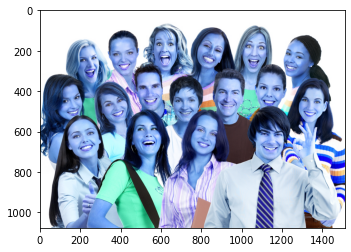

In [50]:
img=cv2.imread('2.jpg')
plt.imshow(img)

In [51]:
img.shape

(1077, 1510, 3)

In [52]:

dw=img.shape[0]
dh=img.shape[1]

In [56]:
obj[:10]

['Tie',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person']

In [57]:
c=0
font = cv2.FONT_HERSHEY_PLAIN
for i in k:
    max_x = int(max([v['x'] for v in i])*dh)
    max_y = int(max([v['y'] for v in i])*dw)
    min_x =int( min([v['x'] for v in i])*dh)
    min_y = int(min([v['y'] for v in i])*dw)
    cv2.rectangle(img, (min_x,min_y), (max_x,max_y),1,2)
    cv2.putText(img,obj[c], (min_x, min_y),font, 1, (255,255,255), 2)
    c=c+1

cv2.imshow('img',img)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [58]:
c=0
font = cv2.FONT_HERSHEY_PLAIN
for i in k[0:7]:
    max_x = int(max([v['x'] for v in i])*dh)
    max_y = int(max([v['y'] for v in i])*dw)
    min_x =int( min([v['x'] for v in i])*dh)
    min_y = int(min([v['y'] for v in i])*dw)
    cv2.rectangle(img, (min_x,min_y), (max_x,max_y),1,2)
    cv2.putText(img,obj[c], (min_x, min_y),font, 1, (255,255,255), 2)
    c=c+1

cv2.imshow('img',img)
cv2.waitKey(10000)
cv2.destroyAllWindows()
    
# dh=
# width = max_x - min_x
# height = max_y - min_y 
# center_x = int(min_x + (width/2))
# center_y =int( min_y + (height/2))
# l = int((min_x - width / 2) * dw)
# r = int((min_x + width / 2) * dw)
# t = int((min_y - height / 2) * dh)
# b = int((min_y + height / 2) * d408
# dw=612h)

# if l < 0:
#     l = 0
# if r > dw - 1:
#     r = dw - 1
# if t < 0:
#     t = 0
# if b > dh - 1:
#     b = dh - 1
# cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
# yolo_row = [center_x, center_y ,width, height]
# print(yolo_row)

In [59]:
obj

['Tie',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person',
 'Person']

In [60]:
left =int(0.3676586151123047*255)
top =int(0.12022683024406433*255)
right=int(0.6142536401748657*255)
bottom=int(0.4522668421268463*255)
right=int(max(right,left)*255)
left=int(min(left,right)*255)
top=int(max(top,bottom)*255)
bottom=int(min(bottom,top)*255)

In [61]:
(left,top, bottom,right)

(23715, 29325, 29325, 39780)

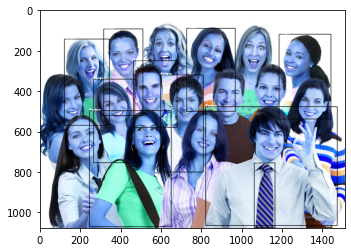

In [62]:
plt.imshow(img)

In [63]:
cv2.rectangle(img, (min_x,min_y), (max_x,max_y),1,2)
# cv2.rectangle(img, (min_, t), (r, b), (0, 0, 255), 1)    
cv2.imshow('img',img)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [64]:
# #### LABEL DETECTION ######

# response_label = client.object_lo(image=image)

# for label in response_label.label_annotations:
#     print({'label': label.description, 'score': label.score})

In [65]:
#### FACE DETECTION ######

# response_face = client.face_detection(image=image)

# face_data = []

# for face_detection in response_face.face_annotations:
#     d = {
#         'confidence': face_detection.detection_confidence,
#         'joy': face_detection.joy_likelihood,
#         'sorrow': face_detection.sorrow_likelihood,
#         'surprise': face_detection.surprise_likelihood,
#         'anger': face_detection.anger_likelihood
#     }
#     print(d)
    

In [66]:
#### IMAGE PROPERTIES ######

# response_image = client.image_properties(image=image)

# image_data = []

# for c in response_image.image_properties_annotation.dominant_colors.colors[:3]:
#     d = {
#         'color': c.color,
#         'score': c.score,
#         'pixel_fraction': c.pixel_fraction
#     }
#     print(d)

In [67]:
#### TEXT DETECTION ######

# response_text = client.text_detection(image=image)

# for r in response_text.text_annotations:
#     d = {
#         'text': r.description
#     }
#     print(d)